In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("Salary.csv")

In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
dataset.shape

(35, 2)

In [7]:
dataset.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [8]:
#missing value detection and treatment
#following values in data set
# blank values
# NaN
# null
# some continous columns might have zero to indicate misssing value

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


In [10]:
dataset.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [11]:
dataset.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [12]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0, 0.5, 'Exprience')

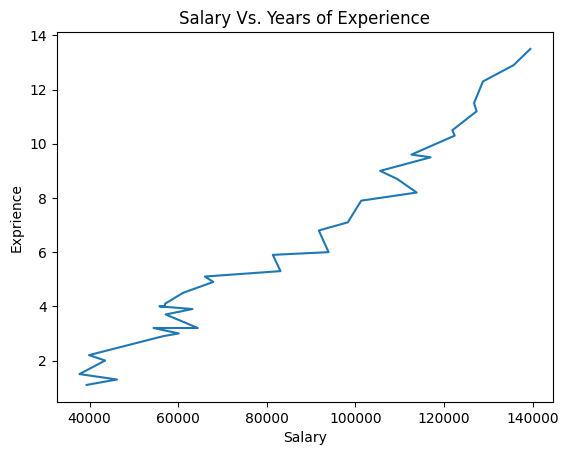

In [13]:
plt.plot(dataset['Salary'],dataset['YearsExperience'])
plt.title("Salary Vs. Years of Experience")
plt.xlabel("Salary")
plt.ylabel("Exprience")

In [14]:
# plot correlation point to understand the multi colinearity in data set 

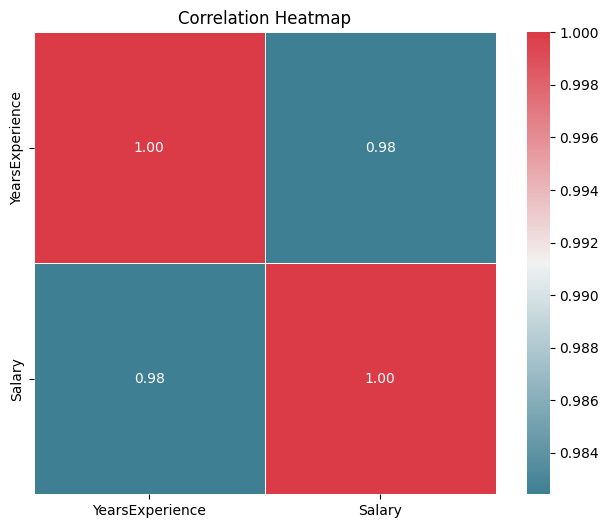

In [15]:
# Assuming `corr` is your correlation matrix
corr = dataset.corr("pearson")
# Pearson correlation coefficient (r) measures the strength and direction of the linear relationship between two continuous variables.

plt.figure(figsize=(8,6))  # Adjust figure size
ax = plt.gca()  # Get current axis

# Heatmap
sns.heatmap(
    corr, 
    mask=np.zeros_like(corr, dtype=bool),  # No masking (can be removed)
    cmap=sns.diverging_palette(220, 10, as_cmap=True),  # Color palette
    square=True,  # Keep it square-shaped
    annot=True,  # Show correlation values
    fmt=".2f",  # Format float values to 2 decimal places
    linewidths=0.5,  # Add lines for better clarity
    ax=ax  # Use specified axis
)

# Show the heatmap
plt.title("Correlation Heatmap")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split 
x=dataset.drop('Salary',axis=1)
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [17]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [18]:
y=dataset['Salary']
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [19]:
# train_test_split?
#  Avoids overfitting → Trains the model on one set and tests on unseen data.
#  Ensures generalization → Checks if the model works well on new data.
#  Fast and simple → One line of code does it efficiently.

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [22]:
L.fit(xtrain,ytrain)

LinearRegression()

In [23]:
y_pred=L.predict(xtest)

In [24]:
print(L.score(xtest,ytest))

0.8914234140042779


In [25]:
# 89% Accuracy

In [26]:
print('actual salary :',y)

actual salary : 0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
30    127345
31    126756
32    128765
33    135675
34    139465
Name: Salary, dtype: int64


In [27]:
print("Predicted salary",y_pred)

Predicted salary [110576.91706292  64251.57268882 103713.90308157  89987.87511888
  71114.58667017 119155.68453961  80551.23089452]
